# STA 130 Individual proposal

# 1.COVID_reduce_people   ---  WELLNESS_life_satisfaction

Variable :

COVID_reduce_people: the extent of people reduce to contact with others in person.
WELLNESS_life_satisfaction: The happiness level of the people

analyses Method: ANOVO(analysis of variance) --Hypothesis testing

Step1: 
get the data of COVID_reduce_people and WELLNESS_life_satisfaction from the original list.

Step2:
Use the python to get the details of the data--such as means, median ,mode,standard deviation.
And create a box plot to see the distribution of WELLNESS_life_satisfaction.

Step3:
Give the 
Null Hypothesis--The mean is the same for all the categories in COVID_prevention_reduce_people .
Alternative Hypothesis-- At least one category has different mean in WELLNESS_life_satisfaction

Step 4:
Create a python code use “statsmodels” library to tackle the problem.

Step 5:
Calculate the P-value and compare with significant level such as 0.05.
To reject the null hypothesis or not.

Category 'Very closely': Mean WELLNESS_life_satisfaction = 6.00, 95% CI = (1.70, 10.30)


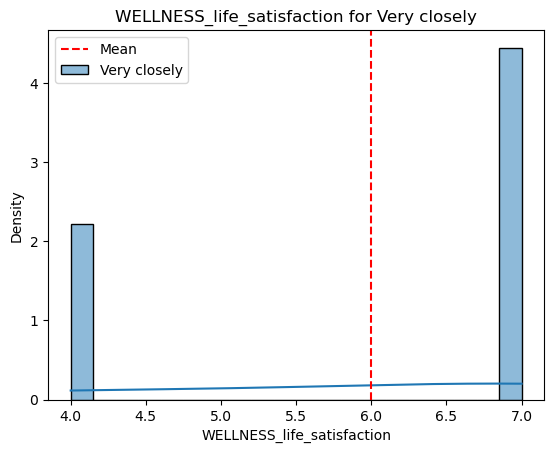

Category 'Somewhat closely': Mean WELLNESS_life_satisfaction = 6.17, 95% CI = (3.40, 8.94)


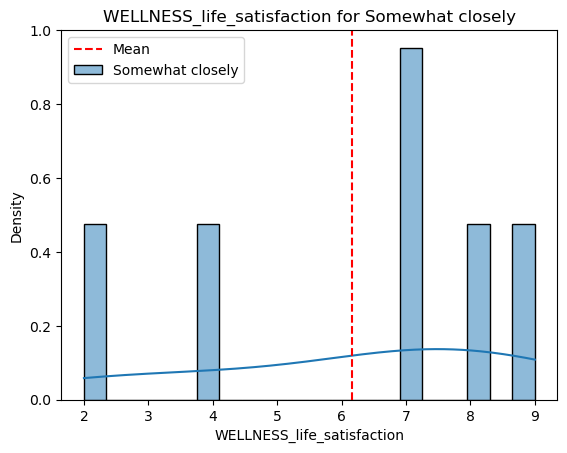

Category 'Not at all': Mean WELLNESS_life_satisfaction = 7.00, 95% CI = (7.00, 7.00)


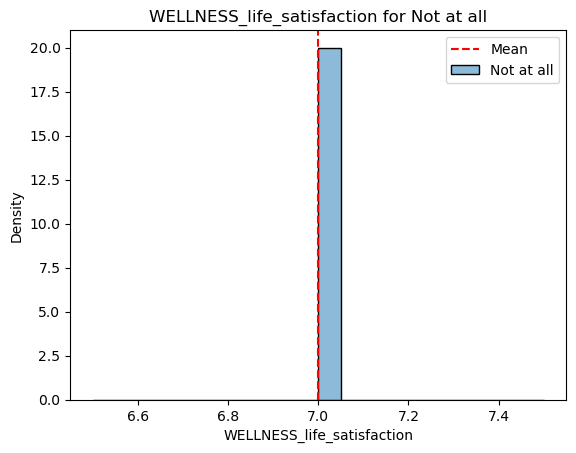

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    'COVID_prevention_reduce_people': ['Very closely', 'Somewhat closely', 'Not at all', 'Somewhat closely', 'Somewhat closely',
                                       'Very closely', 'Somewhat closely', 'Somewhat closely', 'Somewhat closely', 'Very closely'],
    'WELLNESS_life_satisfaction': [4.0, 2.0, 7.0, 8.0, 9.0, 7.0, 7.0, 7.0, 4.0, 7.0]
})

# Check if the data exists
if 'data' in locals() or 'data' in globals():
    if data.empty:
        print("The data is empty. Please provide valid data.")
    else:
        # Iterate over each unique category in 'COVID_prevention_reduce_people'
        categories = data['COVID_prevention_reduce_people'].unique()

        for category in categories:
            # Filter data for the current category
            subset = data[data['COVID_prevention_reduce_people'] == category]['WELLNESS_life_satisfaction'].dropna()

            # Skip empty subsets
            if subset.empty:
                print(f"No data available for category '{category}'. Skipping...")
                continue

            # Calculate mean and standard error of the mean
            mean = np.mean(subset)
            sem = stats.sem(subset) if len(subset) > 1 else 0  # Handle case where only one data point exists

            # Calculate 95% confidence interval (handle case with one data point)
            if len(subset) > 1:
                ci = stats.t.interval(0.95, len(subset) - 1, loc=mean, scale=sem)
            else:
                ci = (mean, mean)  # CI is the mean itself when only one data point exists

            # Print the results
            print(f"Category '{category}': Mean WELLNESS_life_satisfaction = {mean:.2f}, 95% CI = ({ci[0]:.2f}, {ci[1]:.2f})")

            # Plot distribution of 'WELLNESS_life_satisfaction' for each category
            sns.histplot(subset, kde=True, label=f"{category}", stat="density", bins=20)
            plt.axvline(mean, color='r', linestyle='--', label='Mean')
            plt.title(f"WELLNESS_life_satisfaction for {category}")
            plt.xlabel("WELLNESS_life_satisfaction")
            plt.ylabel("Density")
            plt.legend()
            plt.show()  # Ensure each plot is shown separately
else:
    print("The data variable is not defined.")


The p-value equals to 0.937 which is much greater than 0.05, so there we can strongly reject the NULL hypothesis.

Result:
At least one category has different mean in WELLNESS_life_satisfaction

# 2.CONNECTION_activities_text_or_messaged_p3m 
---  WELLNESS_worthless
Variables:
CONNECTION_activities_text_or_message: The frequency of receiving text or message
WELLNESS_worthless: The extent feel yourself worthless

Analysis Method:Build up confidence interval

Step1:
Use the groupby() function in python to group the data by each level in the CONNECTION_activities_text_or_messaged_p3m

Step2:
Give each level a specific number.(Never--0    Almost never--1   Rarely --2  sometimes --3  
                               Often--4  Very often--5
Calculate the mean of the WELLNESS_malach_pines_burnout_measure_worthless.

Step3:
Use the distribution of the mean and with the help of python code:

Find that whether or not the confidence intervals for the means of the WELLNESS_malach_pines_burnout_measure_worthless overlap for the different levels of CONNECTION_activities_text_or_message_p3m.

Step4:
If the situation is Overlapping--There exist a high possibility that these two elements are relevant.

If the situation is Non-overlapping indicates a difference between the categories.

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data initialization
# Replace 'data' with your actual DataFrame
data = pd.DataFrame({
    'CONNECTION_activities_text_or_messaged_p3m': ['Often', 'Sometimes', 'Never', 'Often', 'Rarely', 'Sometimes', 'Never', 'Rarely'],
    'WELLNESS_malach_pines_burnout_measure_worthless': [3.0, 4.5, 5.0, 2.5, 3.8, 4.0, 6.0, 3.3]
})

# Check if 'data' exists and has the required columns
if 'data' in locals() or 'data' in globals():
    if data.empty:
        print("The data is empty. Please provide valid data.")
    elif not all(col in data.columns for col in ['CONNECTION_activities_text_or_messaged_p3m', 'WELLNESS_malach_pines_burnout_measure_worthless']):
        print("The required columns are not present in the data.")
    else:
        # Group by 'CONNECTION_activities_text_or_messaged_p3m' and calculate statistics
        groups = data.groupby('CONNECTION_activities_text_or_messaged_p3m')
        for category, group_data in groups:
            scores = group_data['WELLNESS_malach_pines_burnout_measure_worthless'].dropna()

            # Skip if no valid data points are available
            if scores.empty:
                print(f"Category '{category}' has no valid data. Skipping...")
                continue

            # Calculate mean and standard error of the mean
            mean = np.mean(scores)
            sem = stats.sem(scores) if len(scores) > 1 else 0  # Handle case with a single data point

            # Calculate 95% confidence interval
            if len(scores) > 1:
                ci = stats.t.interval(0.95, len(scores) - 1, loc=mean, scale=sem)
            else:
                ci = (mean, mean)  # For a single data point, the CI is just the mean

            # Print the results
            print(f"Category '{category}': Mean WELLNESS score = {mean:.2f}, 95% CI = ({ci[0]:.2f}, {ci[1]:.2f})")
else:
    print("The data variable is not defined.")



Category 'Never': Mean WELLNESS score = 5.50, 95% CI = (-0.85, 11.85)
Category 'Often': Mean WELLNESS score = 2.75, 95% CI = (-0.43, 5.93)
Category 'Rarely': Mean WELLNESS score = 3.55, 95% CI = (0.37, 6.73)
Category 'Sometimes': Mean WELLNESS score = 4.25, 95% CI = (1.07, 7.43)


# 3.COVID_reduce_people   ---  WELLNESS_life_satisfaction

Variables:

COVID_reduce_people: the extent of people reduce to contact with others in person.
WELLNESS_life_satisfaction: The happiness level of the people

Analysis Method: linear regression.

Step1:
Convert categorical data in COVID_prevention_reduce_people to specific numbers.
Not at all = 0
Somewhat closely = 1
Very close = 2

Set the Independent Variable:
COVID_prevention_reduce_people

Set the Dependent Variable:
WELLNESS_life_satisfaction

Step2:
Use the python code to get the linear regression model:

Step3:
We can get coefficient, P-value and the R-squared.

If R-squared value approaching to 1,which means the model fits well.And there exist high relevancy between these two variables.

Otherwise, the model can not fit the data well, which means there does not have high probability that these two variables is relevant.

# Preference for group members:

  I prefer to choose Shiqi Lan from the same tutorial class as my team member .Because we have complete some presentations in the tutorial class together.And we have the same mother language--mandarin, So it will be more effective for us to communicate with this topic in the group work.
 
